## Observations and Insights 

One thing I noticed from more of a top down perspective was that there is still so much that could be dug up from this data set. I was looking at some of the basic descriptive summaries from the tumor volumes per drug regimen. Capomulin and Ramicane seem the most effective relative to other drugs, but we would have to dive into those drugs more specifically in order to get adequate analysis considering we visualized things like means that only show us one kind of insight. There is more statistical analysis to be done in order to prove those drugs effective, even though they look to be from our overview.

Somewhat of a follow-up point to the last, there was a strong correlation between mouse weight and tumor size. This suggests that there is a lot of room for drug companies or individuals with malicious intent to use smaller mice if they decide to report a sample that shows raw tumor size after treatment relative to other groups. That is one clear way I can think this data could be manipulated to show something that might not be all too accurate. If I had more time to explore in this data set, that might be what I look at. 

When we broke the data down into the four regiments looking at quartiles, regression, etc., I poked around in the data a little bit and saw some of the regimens were generally carried out on much larger tumors.  That raised another question in my mind: are these drugs more effective in reducing a tumor that has more cells, or do they work faster on tumors that are smaller to begin with because there is less total mass to remove?

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
# Combine the data into a single dataset
full_data = pd.merge(mouse_metadata, study_results)

In [5]:
# Display the data table for preview
full_data.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
full_data["Mouse ID"].nunique()

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = full_data[full_data.duplicated(subset = ["Mouse ID", "Timepoint"], keep = False)]

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = full_data[full_data["Mouse ID"] != "g989"]

In [10]:
# Checking the number of mice in the clean DataFrame.
clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tum_mean = clean_data["Tumor Volume (mm3)"].mean()
tum_median = clean_data["Tumor Volume (mm3)"].median()
tum_variance = clean_data["Tumor Volume (mm3)"].var()
tum_stdev = clean_data["Tumor Volume (mm3)"].std()
tum_sem = clean_data["Tumor Volume (mm3)"].sem()

tum = {"Descriptive": (["Mean", "Median", "Variance", "Standard Deviation", "Standard Error"]),
         "Tumor Volume (mm3)": ([tum_mean, tum_median, tum_variance, tum_stdev, tum_sem])}

tum_df = pd.DataFrame(tum).set_index(["Descriptive"])
tum_df

,Tumor Volume (mm3)
Descriptive,
Mean,50.435293
Median,48.933454
Variance,79.462907
Standard Deviation,8.914197
Standard Error,0.205591


In [12]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_grouping = clean_data.groupby(by = ["Drug Regimen"])

tum_mean_dr = drug_grouping["Tumor Volume (mm3)"].mean()
tum_median_dr = drug_grouping["Tumor Volume (mm3)"].median()
tum_variance_dr = drug_grouping["Tumor Volume (mm3)"].var()
tum_stdev_dr = drug_grouping["Tumor Volume (mm3)"].std()
tum_sem_dr = drug_grouping["Tumor Volume (mm3)"].sem()

tum_df_dr = pd.concat([tum_mean_dr, tum_median_dr, tum_variance_dr, tum_stdev_dr, tum_sem_dr], axis = 1)

tum_df_dr.columns.values[0] = "Mean"
tum_df_dr.columns.values[1] = "Median"
tum_df_dr.columns.values[2] = "Variance"
tum_df_dr.columns.values[3] = "Standard Deviation"
tum_df_dr.columns.values[4] = "Standard Error"

tum_df_dr

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_grouping_tum = drug_grouping["Tumor Volume (mm3)"]

drug_grouping_tum.agg(["mean", "median", "var", "std", "sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

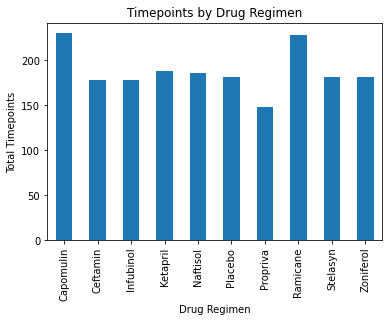

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_list = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

drug_grouping_time = drug_grouping["Timepoint"].count()

time_plot = drug_grouping_time.plot(kind = "bar", title = "Timepoints by Drug Regimen")
time_plot.set_ylabel("Total Timepoints")

plt.show()

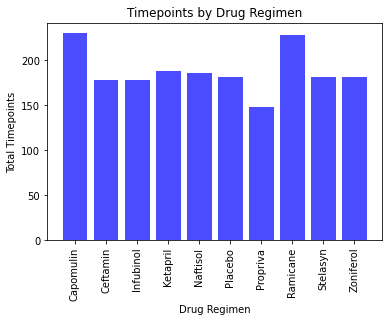

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_grouping_time_2 = drug_grouping_time.tolist()
x_range = np.arange(len(drug_grouping_time_2))

plt.title("Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.xticks(x_range, drug_list, rotation = 90)

plt.bar(x_range, drug_grouping_time_2, color = "blue", alpha = 0.7, align = "center") 
plt.show()

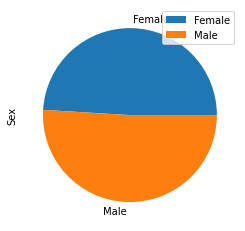

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Find the values of male and female mice
sex = clean_data.groupby(by = "Sex").count()

sex_df = pd.DataFrame({"Sex": [922, 958]},
                      index = ["Female", "Male"])

m_and_f_pie = sex_df.plot.pie(y = "Sex")
plt.show()

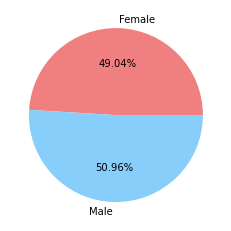

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_count = [922, 958]
m_and_f = ["Female", "Male"]
colors = ["lightcoral", "lightskyblue"]

plt.pie(sex_count, labels = m_and_f, colors = colors, autopct = "%1.2f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse and dropping all other timepoints
clean_data.sort_values(by = "Timepoint", ascending = False)

no_dups = clean_data.drop_duplicates(subset = ["Mouse ID", "Drug Regimen"], keep = "last")

# Clean the dataframe to include only drugs of interest and Tumor Volume for each greatest timepoint
CRIC_df = no_dups.loc[(no_dups["Drug Regimen"] == "Capomulin") | (no_dups["Drug Regimen"] == "Ramicane")
                                | (no_dups["Drug Regimen"] == "Infubinol") | (no_dups["Drug Regimen"] == "Ceftamin")]

box_df = CRIC_df.filter(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])
box_df.set_index("Mouse ID")


,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
k403,Ramicane,22.050126
s185,Capomulin,23.343598
x401,Capomulin,28.484033
m601,Capomulin,28.430964
g791,Ramicane,29.128472
...,...,...
x822,Ceftamin,61.386660
y163,Infubinol,67.685569
y769,Ceftamin,68.594745


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tum_quartiles = box_df.quantile([.25, .5, .75])
low = tum_quartiles.iat[0,0]
high = tum_quartiles.iat[2,0]
tum_iqr = (high - low)
tum_iqr

lower_bound = low - (1.5 * tum_iqr)
upper_bound = high + (1.5 * tum_iqr)

print(f"Potential outliers for all four regimens together could be smaller than {lower_bound} or larger than {upper_bound}.")

# Organize all tumor volumes and extract them by drug regimen
cap_df = box_df[box_df["Drug Regimen"] == "Capomulin"]
ram_df = box_df[box_df["Drug Regimen"] == "Ramicane"]
inf_df = box_df[box_df["Drug Regimen"] == "Infubinol"]
cef_df = box_df[box_df["Drug Regimen"] == "Ceftamin"]

cap_list = cap_df["Tumor Volume (mm3)"].to_list()
ram_list = ram_df["Tumor Volume (mm3)"].to_list()
inf_list = inf_df["Tumor Volume (mm3)"].to_list()
cef_list = cef_df["Tumor Volume (mm3)"].to_list()

Potential outliers for all four regimens together could be smaller than 3.0739668737500097 or larger than 94.04403868374999.


In [20]:
# Check our dataframe for any outliers among all current regimens
box_df.sort_values(by = "Tumor Volume (mm3)", ascending = True)

# None of the values fall outside the range, so no outliers are obvious when we analyze all four drugs combined

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
19,s185,Capomulin,23.343598
39,m601,Capomulin,28.430964
29,x401,Capomulin,28.484033
49,g791,Ramicane,29.128472
...,...,...,...
1112,l471,Ceftamin,67.748662
463,a203,Infubinol,67.973419
1845,y769,Ceftamin,68.594745
1033,k210,Ceftamin,68.923185


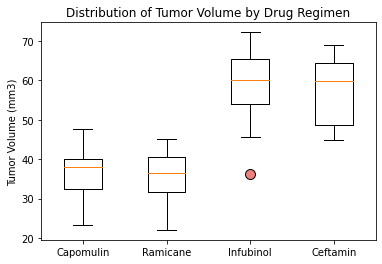

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
drug_dict = {"Capomulin": cap_list, 
             "Ramicane": ram_list,
            "Infubinol": inf_list,
            "Ceftamin": cef_list}

fig, ax1 = plt.subplots()
ax1.boxplot(drug_dict.values(), flierprops = {"markersize": "10", "markerfacecolor": "lightcoral"})
ax1.set_xticklabels(drug_dict.keys())
plt.ylabel("Tumor Volume (mm3)")
plt.title("Distribution of Tumor Volume by Drug Regimen")

plt.show()

## Line and Scatter Plots

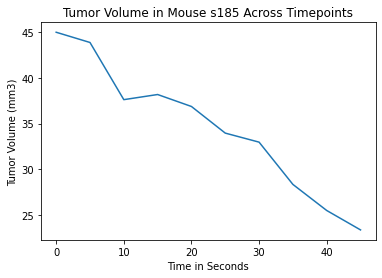

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_df = clean_data[clean_data["Mouse ID"] == "s185"]
line_df = s185_df.filter(["Timepoint", "Tumor Volume (mm3)"])

tum_list_2 = line_df["Tumor Volume (mm3)"].to_list()
time_list = line_df["Timepoint"].to_list()

tumtime_plot = plt.plot(time_list, tum_list_2)
plt.xlabel("Time in Seconds")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume in Mouse s185 Across Timepoints")
plt.show()

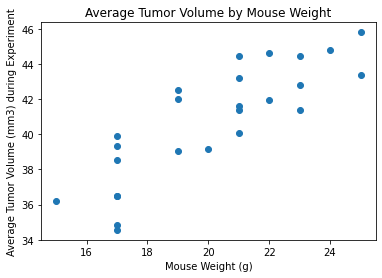

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_data[clean_data["Drug Regimen"] == "Capomulin"]

capomulin_df = capomulin_df.groupby(by = "Mouse ID").mean()
capomulin_df

tumcap_list = capomulin_df["Tumor Volume (mm3)"].to_list()
weight_list = capomulin_df["Weight (g)"].to_list()

plt.scatter(weight_list, tumcap_list)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3) during Experiment")
plt.title("Average Tumor Volume by Mouse Weight")
plt.show()

## Correlation and Regression

Correlation:0.84


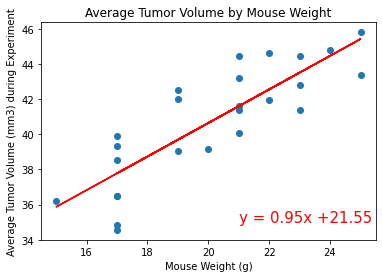

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = capomulin_df["Weight (g)"]
y = capomulin_df["Tumor Volume (mm3)"]

plt.scatter(x, y)

(slope, intercept, correlation, pvalue, stderr) = linregress(x, y)

regression = (x) * slope + intercept

lob = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))

plt.plot(x, regression, "r")

plt.annotate(lob, (21, 35), fontsize = 15, color = "r")

plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3) during Experiment")
plt.title("Average Tumor Volume by Mouse Weight")

print("Correlation:" + str(round(correlation, 2)))

plt.show()